In [1]:
import torch
import numpy as np
import pandas as pd
from preProcessing import *
from CNN import *
import torchvision.transforms as T
from PIL import Image

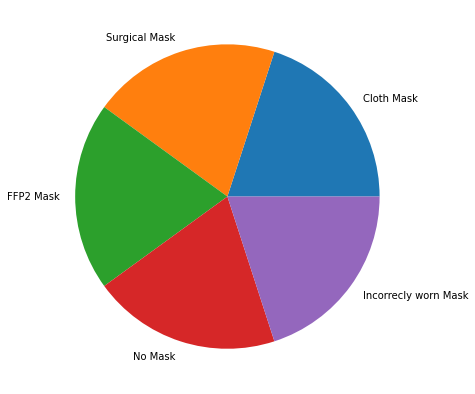

In [9]:

# Import libraries
from matplotlib import pyplot as plt
import numpy as np


 
# Creating dataset
masks_types = ['Cloth Mask',
'Surgical Mask',
'FFP2 Mask',
'No Mask',
'Incorrecly worn Mask']
 
data = [400,400,400,400,400]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = masks_types)

# show plot
plt.show()
fig.savefig('piedata.png', format='png')

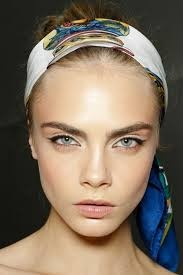

In [2]:
#Change the path
imagePath = '/private/var/hormone03/Dropbox/My Mac (Mac’s MacBook Pro)/Desktop/ConcordiaDOCS/myCourses/Applied_Artificial_Intelligence/AI_project/S01_9.jpg'
modelPath = '/private/var/hormone03/Dropbox/My Mac (Mac’s MacBook Pro)/Desktop/ConcordiaDOCS/myCourses/Applied_Artificial_Intelligence/AI_project/trained_model.pth'
im = Image.open(imagePath)
display(im)

In [3]:
labels = ['using cloth mask', 'using surgical mask', 'using FFP2 mask', 'not using mask', 'using mask incorrectly']
def processImage(imagePath):
    # Cal. image parameters (mean and std)
    img = Image.open(imagePath).convert('L').resize((img_size, img_size))
    img = np.array(img)
    img = img.astype(np.float64) / 255.0
    data_sum = np.sum(img)
    mean = data_sum /(img_size*img_size)
    std = np.std(img)

    # Transform
    image_transforms = T.Compose([
        T.Resize((img_size, img_size)),
        T.Grayscale(),
        T.ToTensor(),
        T.Normalize([mean],[std]),
    ])

    # Get Images
    image = Image.open(imagePath)
    image = image_transforms(image)
    
    return image


In [4]:
image_ = processImage(imagePath)
image_


tensor([[[-1.1860, -1.1860, -1.1860,  ..., -0.9530, -0.9530, -0.9255],
         [-1.1860, -1.1860, -1.1860,  ..., -0.9530, -0.9530, -0.9255],
         [-1.1860, -1.1860, -1.1860,  ..., -0.9392, -0.9392, -0.9392],
         ...,
         [ 0.8295,  0.8980,  0.9666,  ..., -0.9941, -1.0901, -1.1175],
         [ 0.9529,  0.8980,  0.8432,  ..., -0.9530, -1.1175, -1.1038],
         [ 1.0626,  1.0763,  1.0626,  ..., -0.7199, -1.0215, -1.0764]]])

In [5]:
def Test(modelPath, imagePath):
    #Set the CNN module in evaluation mode:
    image = processImage(imagePath)
    image = image.reshape(1, 1, 64, 64)
    model = torch.load(modelPath)
    model.eval()
    # print(summary(cnn, input_size=(1, 64,64)))
    #disable the gradient calculation in test mode 
    with torch.no_grad():
        output = model(image)
        max_element, max_idx = torch.max(output.data, 1)
        #print(output)
        print("The person is ", labels[max_idx])
    
    return output, max_element, max_idx
        

In [6]:
#Test(modelPath, imagePath)

In [7]:
outputs, max_elements, max_idxs = Test(modelPath, imagePath)

The person is  not using mask


# RESULTS

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# model1

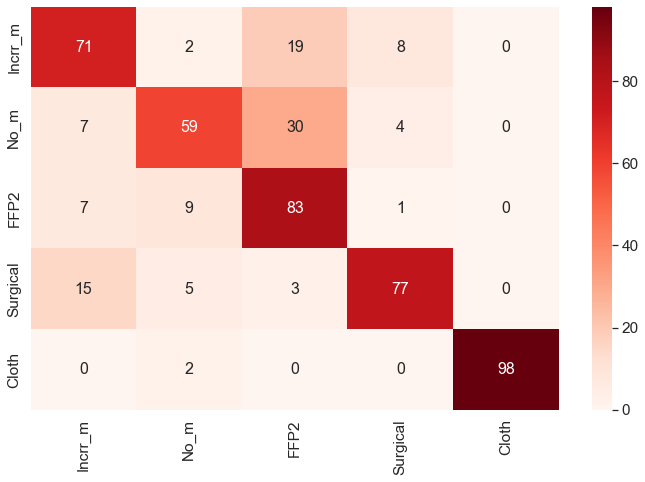

In [33]:
model1 = [[71,  2, 19,  8 , 0],
 [ 7, 59, 30,  4,  0],
 [ 7,  9, 83,  1,  0],
 [15,  5,  3, 77,  0],
 [ 0,  2,  0,  0, 98]] 

x = [0.5, 1.5, 2.5, 3.5, 4.5]
labels = ['Incrr_m', 'No_m', 'FFP2', 'Surgical', 'Cloth']
df_cm = pd.DataFrame(model1, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Reds", annot_kws={"size": 16}) # font size
plt.xticks(x, labels, rotation='vertical')
plt.yticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.savefig('images/conf1.eps')  
plt.show()

# model2

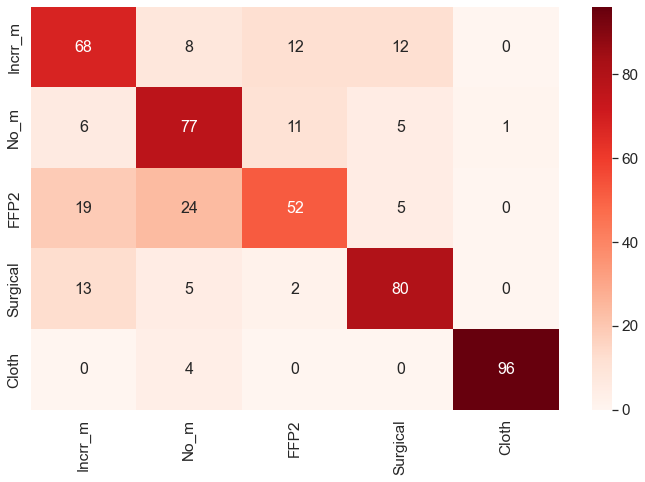

In [36]:
model2 = [[68,  8, 12, 12,  0],
 [ 6 ,77, 11,  5, 1],
 [19, 24, 52,  5,  0],
 [13,  5,  2, 80,  0],
 [ 0,  4,  0,  0, 96]]

df_cm = pd.DataFrame(model2, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Reds", annot_kws={"size": 16}) # font size
plt.xticks(x, labels, rotation='vertical')
plt.yticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.savefig('images/conf2.eps')  
plt.show()

# Model3

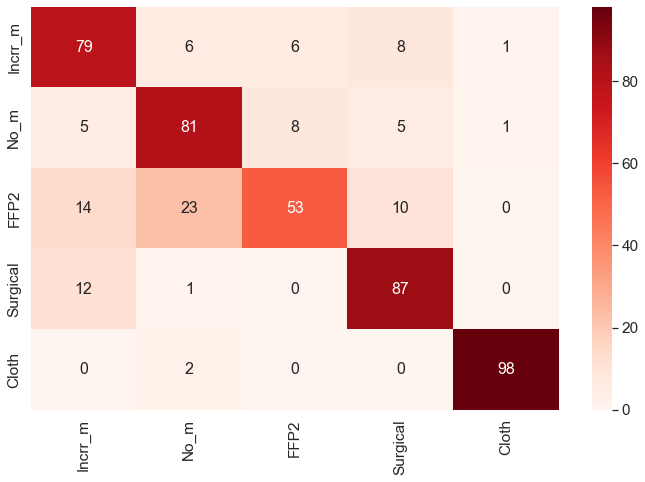

In [39]:
model3 = [[79,  6,  6,  8,  1],
 [ 5, 81,  8,  5,  1],
 [14, 23, 53, 10,  0],
 [12,  1,  0, 87,  0],
 [ 0,  2,  0,  0, 98]] 

df_cm = pd.DataFrame(model3, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Reds", annot_kws={"size": 16}) # font size
plt.xticks(x, labels, rotation='vertical')
plt.yticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.savefig('images/conf3.eps')  
plt.show()

In [56]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """
    
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 4) * bar_width + bar_width / 4

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


#if __name__ == "__main__":
    # Usage example:


# Precision

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


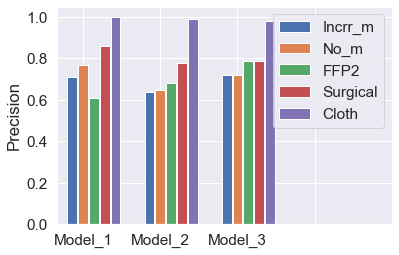

In [61]:
data = {
    "Incrr_m": [0.71, 0.64,0.72],
    "No_m": [0.77,0.65,0.72],
    "FFP2": [0.61,0.68,0.79],
    "Surgical": [0.86,0.78,0.79],
    "Cloth": [1.00,0.99,0.98 ],

}


fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.7, single_width=.9)
plt.xticks(range(5), ["Model_1", "Model_2", "Model_3"])
#plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.savefig('images/precision.eps')
plt.show()


# Recall

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


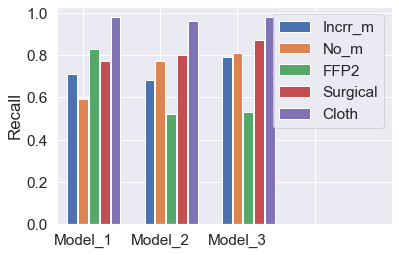

In [62]:
data = {
    "Incrr_m": [0.71, 0.68,0.79],
    "No_m": [0.59,0.77,0.81],
    "FFP2": [0.83,0.52,0.53],
    "Surgical": [0.77,0.80,0.87],
    "Cloth": [0.98, 0.96,0.98 ],

}


fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.7, single_width=.9)
plt.xticks(range(5), ["Model_1", "Model_2", "Model_3"])
#plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.savefig('images/Recall.eps')
plt.show()


# F-1 Scores

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


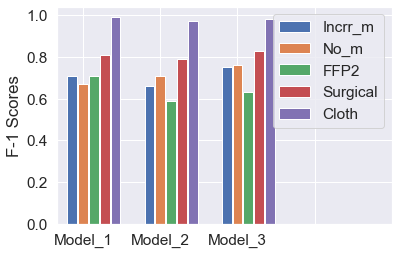

In [63]:
data = {
    "Incrr_m": [0.71, 0.66,0.75],
    "No_m": [0.67,0.71,0.76],
    "FFP2": [0.71,0.59,0.63],
    "Surgical": [0.81,0.79,0.83],
    "Cloth": [0.99, 0.97,0.98 ],

}


fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.7, single_width=.9)
plt.xticks(range(5), ["Model_1", "Model_2", "Model_3"])
#plt.xlabel('Algorithms')
plt.ylabel('F-1 Scores')
plt.savefig('images/f_1_scores.eps')
plt.show()
